In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Read hyperopt data
lines_start = 4200
lines_end = -1
df = pd.read_csv("../results/hyperopt.csv")  # .iloc[lines_start:lines_end]

# Baseline
df_baseline = pd.read_csv("../results/data_clean.csv")
df_baseline["adapter"] = df_baseline["adapter"].fillna("no_adapter")

df.head(5)

,dataset,model,adapter,n_features,n_components,context_length,forecasting_horizon,num_layers,hidden_dim,learning_rate,...,use_revin,beta,train_size,training,p,fixed_logvar,ks,ece,test_ks,test_ece
0,Illness_pred=24,AutonLab/MOMENT-1-small,VAE,7.0,1.0,512.0,24.0,1.0,128.0,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Illness_pred=24,AutonLab/MOMENT-1-small,VAE,7.0,1.0,512.0,24.0,2.0,64.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Illness_pred=24,AutonLab/MOMENT-1-small,VAE,7.0,1.0,512.0,24.0,1.0,128.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Illness_pred=24,AutonLab/MOMENT-1-small,VAE,7.0,1.0,512.0,24.0,2.0,64.0,0.001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Illness_pred=24,AutonLab/MOMENT-1-small,VAE,7.0,1.0,512.0,24.0,1.0,128.0,0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
forecasting_horizon = 96
dataset_name = "ETTh1" + f"_pred={forecasting_horizon}"
model_name = "AutonLab/MOMENT-1-small"
adapter = "linearlVAE"
n_components = 7
hypers = [
    # "hidden_dim",
    # "learning_rate",
    # "batch_size",
    # "num_coupling",
    # "num_layers",
    # "use_revin",
    "beta",
    # "p",
    "fixed_logvar",
]

df_sub = df[
    (df["dataset"] == dataset_name)
    & (df["model"] == model_name)
    & (df["adapter"] == adapter)
    & (df["n_components"] == n_components)
]
df_baseline_sub = df_baseline[
    (df_baseline["dataset"] == dataset_name.split("_")[0])
    & (df_baseline["foundational_model"] == model_name)
    & (df_baseline["is_fine_tuned"] == "ft")
    & (df_baseline["adapter"] == "no_adapter")
]

df_sub.head(5)

,dataset,model,adapter,n_features,n_components,context_length,forecasting_horizon,num_layers,hidden_dim,learning_rate,...,use_revin,beta,train_size,training,p,fixed_logvar,ks,ece,test_ks,test_ece
3250,ETTh1_pred=96,AutonLab/MOMENT-1-small,linearlVAE,7.0,7.0,512.0,96.0,NaN,NaN,0.001,...,1.0,4.0,500.0,full,NaN,2.0,0.529920,0.238163,0.554202,0.244709
3251,ETTh1_pred=96,AutonLab/MOMENT-1-small,linearlVAE,7.0,7.0,512.0,96.0,NaN,NaN,0.001,...,1.0,4.0,500.0,full,NaN,2.0,0.495243,0.228688,0.558293,0.244180
3252,ETTh1_pred=96,AutonLab/MOMENT-1-small,linearlVAE,7.0,7.0,512.0,96.0,NaN,NaN,0.001,...,1.0,2.0,500.0,full,NaN,1.5,0.481453,0.224910,0.477736,0.217166
3253,ETTh1_pred=96,AutonLab/MOMENT-1-small,linearlVAE,7.0,7.0,512.0,96.0,NaN,NaN,0.001,...,1.0,0.5,500.0,full,NaN,NaN,0.441668,0.207354,0.425245,0.193711
3254,ETTh1_pred=96,AutonLab/MOMENT-1-small,linearlVAE,7.0,7.0,512.0,96.0,NaN,NaN,0.001,...,1.0,1.0,500.0,full,NaN,0.5,0.438674,0.202896,0.434782,0.200272


In [12]:
df_sub.loc[:, "fixed_logvar"] = df_sub["fixed_logvar"].fillna("auto")

In [13]:
df_baseline_clean = df_baseline_sub.drop(
    columns=[
        "dataset",
        "foundational_model",
        "adapter",
        "n_features",
        "forecasting_horizon",
        "n_components",
        "context_length",
        "is_fine_tuned",
    ],
    inplace=False,
)
df_clean = df_sub.drop(
    columns=[
        "dataset",
        "model",
        "adapter",
        "n_features",
        "forecasting_horizon",
        "n_components",
        "context_length",
    ],
    inplace=False,
)
df_clean = df_clean.loc[:, df_clean.nunique() != 1]
df_clean = df_clean.dropna(axis=1, how="all")
df_clean = df_clean.loc[:, ~df_clean.columns.str.contains("scaled")]
df_clean = df_clean.dropna()
df_clean.head(5)

,running_time,mse,mae,test_mse,test_mae,beta,fixed_logvar,ks,ece,test_ks,test_ece
3250,215.673462,0.814056,0.645711,0.806197,0.603214,4.0,2.0,0.529920,0.238163,0.554202,0.244709
3251,450.103248,0.804513,0.634112,0.721554,0.569566,4.0,2.0,0.495243,0.228688,0.558293,0.244180
3252,790.548770,0.649225,0.571152,0.488976,0.476160,2.0,1.5,0.481453,0.224910,0.477736,0.217166
3253,1034.780569,0.578532,0.527583,0.439859,0.443710,0.5,auto,0.441668,0.207354,0.425245,0.193711
3254,1169.990339,0.530290,0.512908,0.435850,0.448104,1.0,0.5,0.438674,0.202896,0.434782,0.200272


In [14]:
df_baseline_clean.head(5)

,pca_in_preprocessing,use_revin,running_time,seed,metric,value,train_size
2310,False,False,103.505135,13316.0,mse,0.432376,1000.0
2311,False,False,103.505135,13316.0,mae,0.431743,1000.0
2312,False,False,103.505135,13316.0,scaled_mse,0.429752,1000.0
2313,False,False,103.505135,13316.0,scaled_mae,0.432362,1000.0
2318,False,False,61.597430,22282.0,mse,0.432127,1000.0


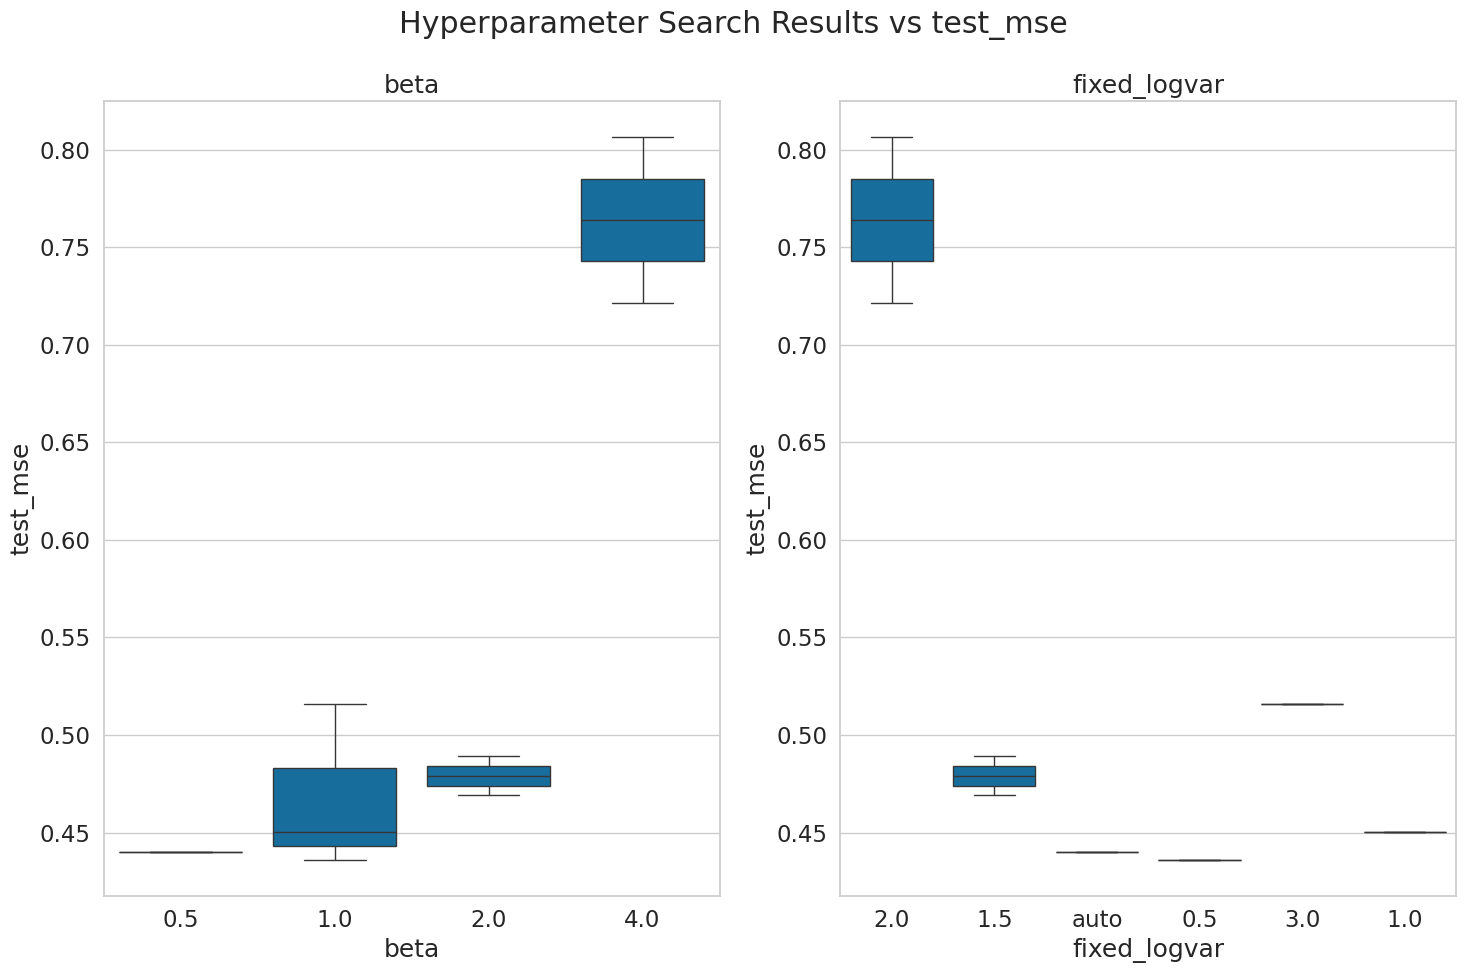

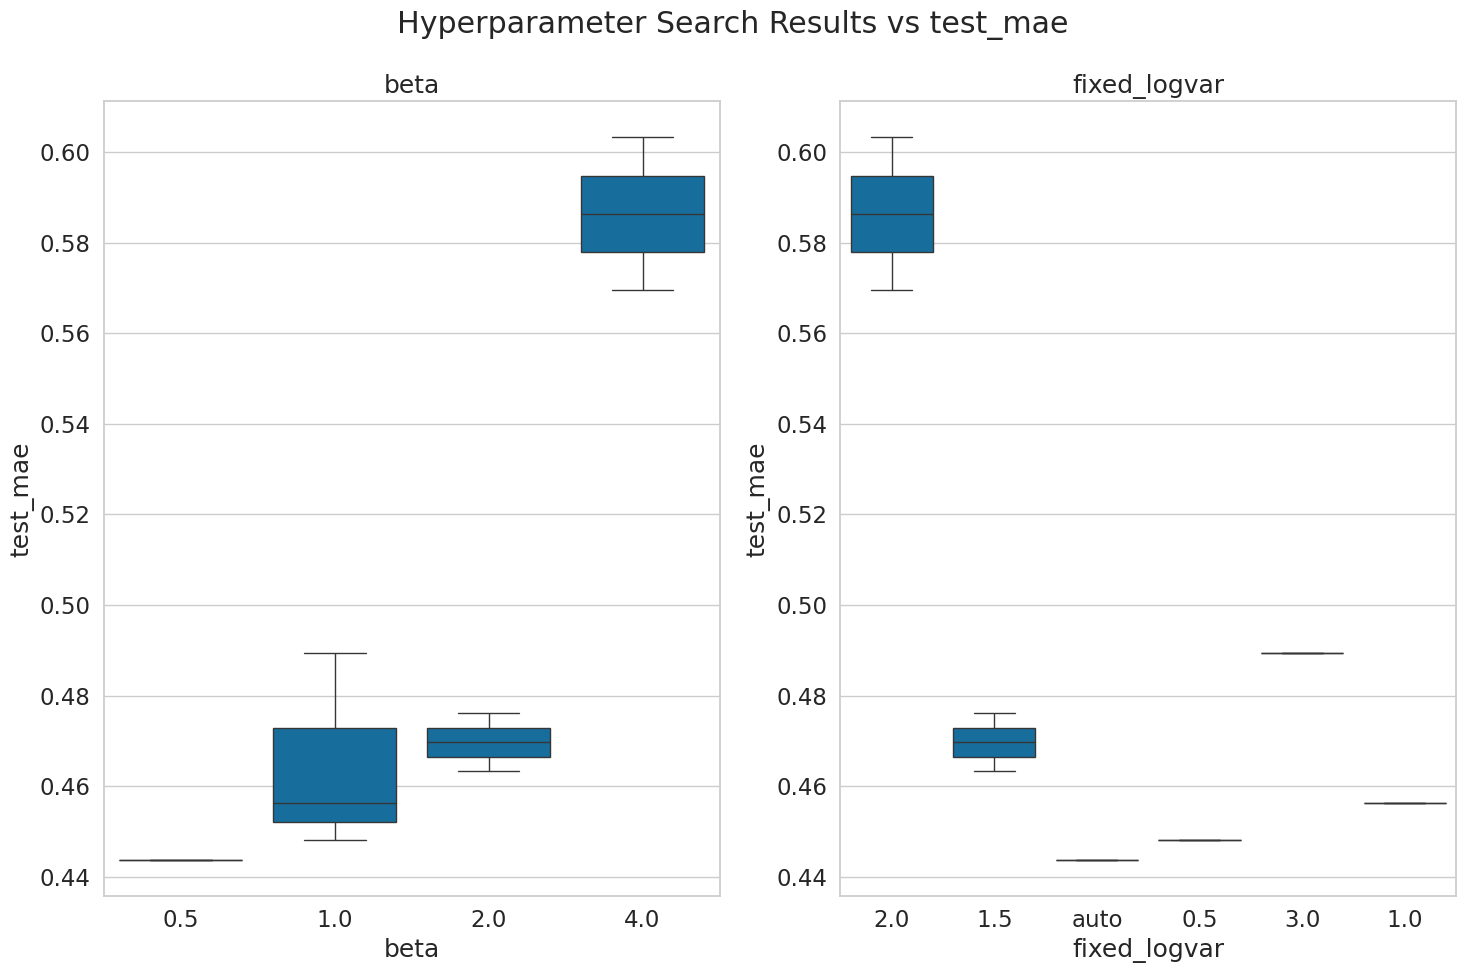

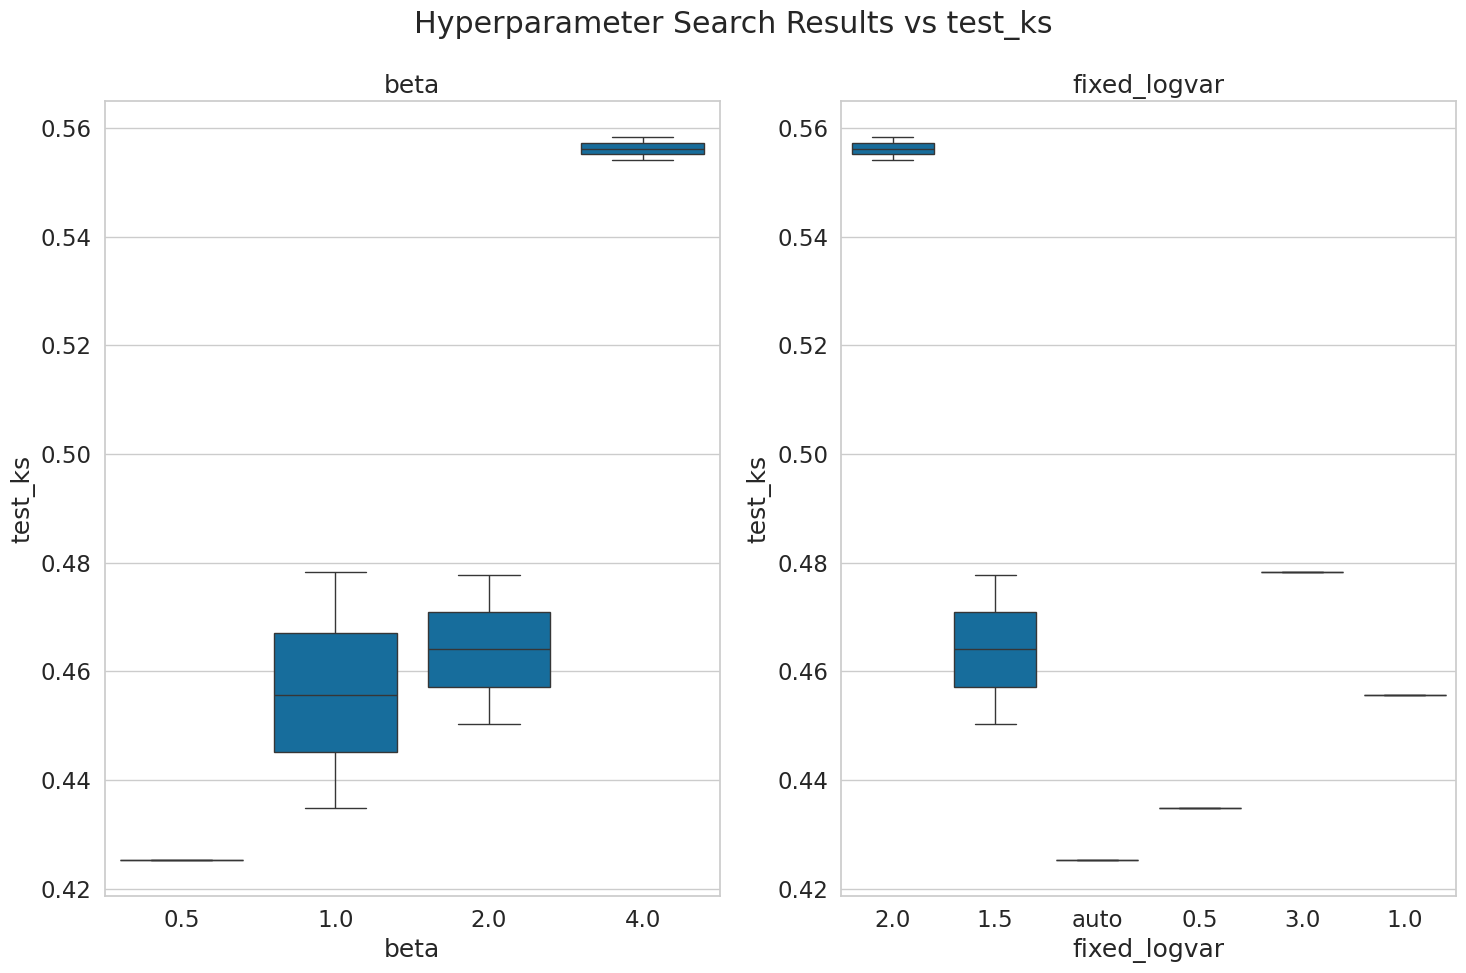

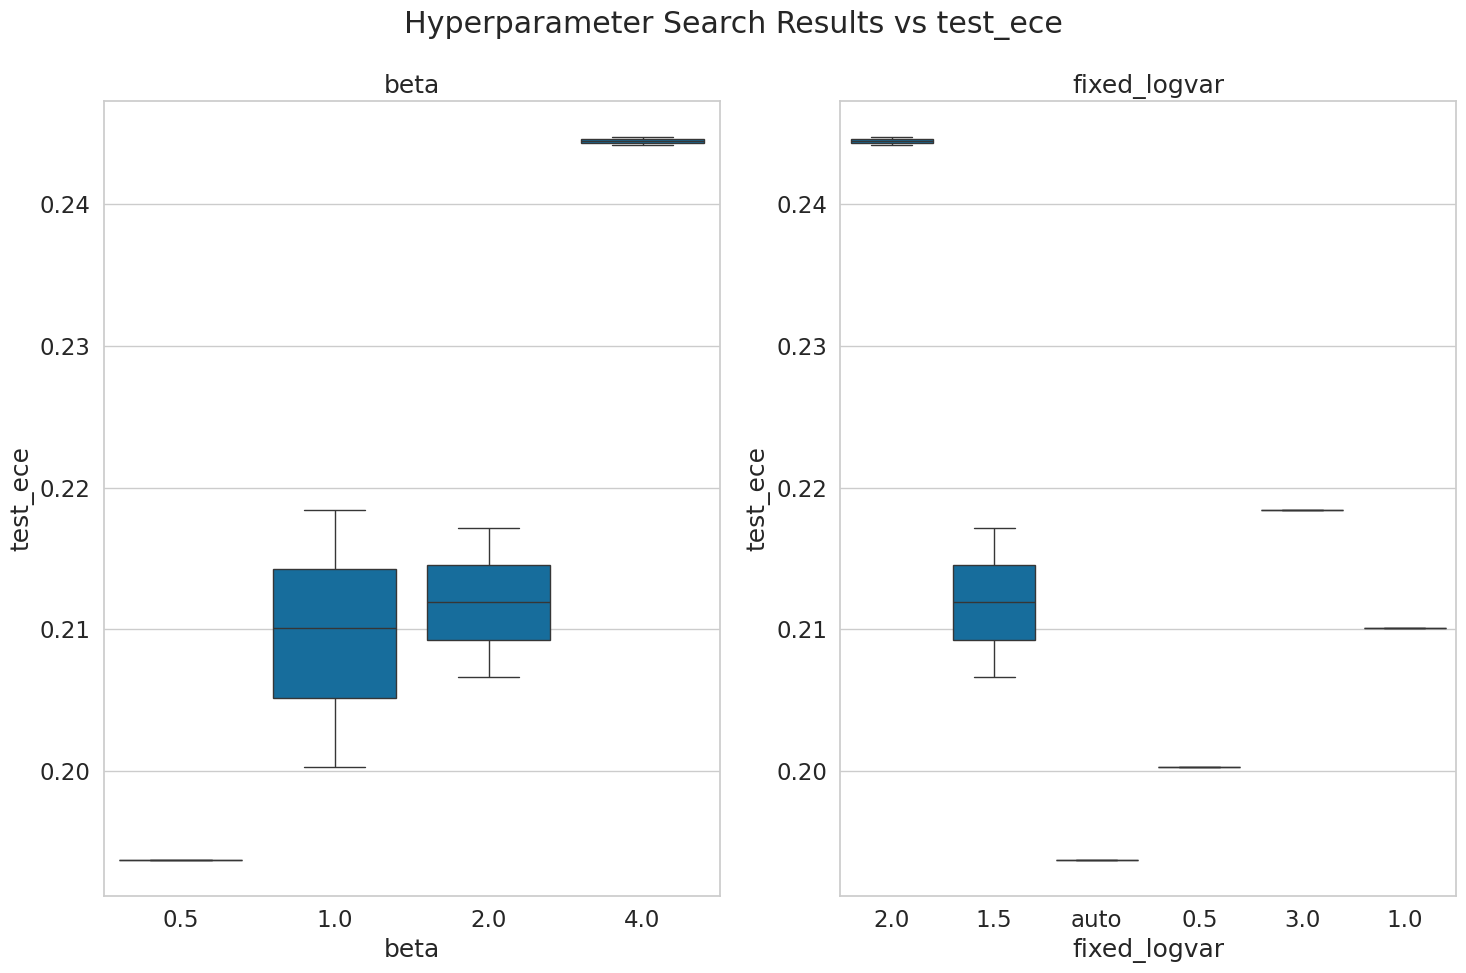

In [15]:
metric = "test_mse"

# Create subplots for each hyperparameter
for metric in ["test_mse", "test_mae", "test_ks", "test_ece"]:
    fig, axes = plt.subplots(len(hypers) // 2 + len(hypers) % 2, 2, figsize=(15, 10))
    axes = axes.flatten()
    fig.suptitle(f"Hyperparameter Search Results vs {metric}")

    for i, hyper in enumerate(hypers):
        if hyper in df_clean.columns:
            sns.boxplot(data=df_clean, x=hyper, y=metric, ax=axes[i])
        axes[i].set_title(hyper)

    plt.tight_layout()
plt.show()

In [16]:
# Group by the hyperparameters and calculate mean and std for each metric
grouped_df = df_clean.groupby(hypers).agg(["mean", "std", "count"])

# Flatten the MultiIndex columns
grouped_df.columns = ["_".join(col).strip() for col in grouped_df.columns.values]

grouped_df.reset_index(inplace=True)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


[metric: mse]
beta            1.0
fixed_logvar    0.5
Name: 1, dtype: object
 0.4358502801472027+-nan  
---

[metric: mae]
beta            1.0
fixed_logvar    0.5
Name: 1, dtype: object
 0.4358502801472027+-nan  
---

[metric: test_mse]
beta            1.0
fixed_logvar    0.5
Name: 1, dtype: object
 0.4358502801472027+-nan  
---

baseline(test_mse): 0.4322510413466988 +- 0.00012452757033679096
[metric: test_mae]
beta             0.5
fixed_logvar    auto
Name: 0, dtype: object
 0.4398585845720948+-nan  
---

baseline(test_mae): 0.43238340582980406 +- 0.0006408295088349002
[metric: ece]
beta            1.0
fixed_logvar    0.5
Name: 1, dtype: object
 0.4358502801472027+-nan  
---

[metric: test_ece]
beta             0.5
fixed_logvar    auto
Name: 0, dtype: object
 0.4398585845720948+-nan  
---

baseline(test_ece): nan +- nan
[metric: ks]
beta            1.0
fixed_logvar    0.5
Name: 1, dtype: object
 0.4358502801472027+-nan  
---

[metric: test_ks]
beta             0.5
fixed_logvar    aut

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

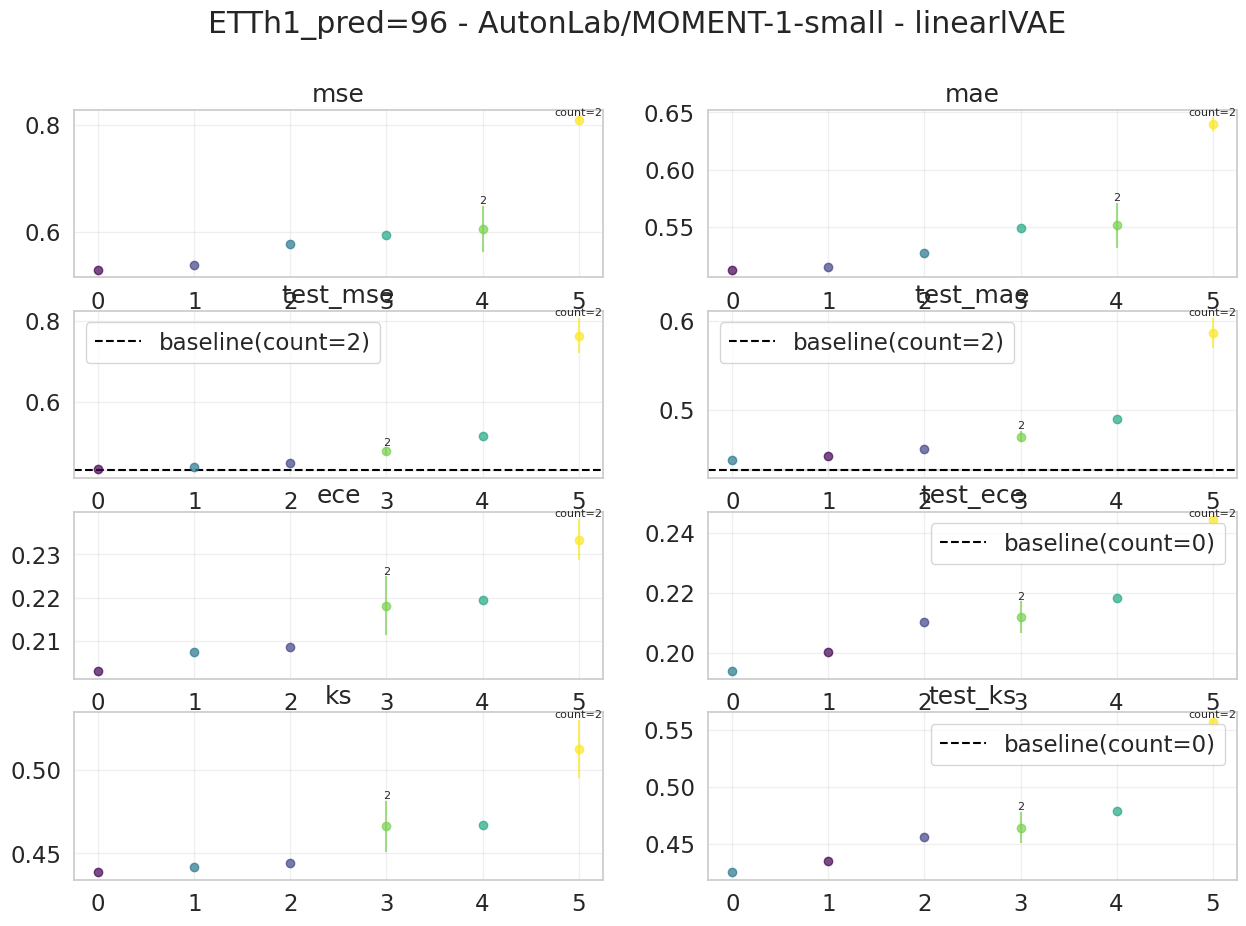

,beta,fixed_logvar,running_time_mean,running_time_std,running_time_count,mse_mean,mse_std,mse_count,mae_mean,mae_std,...,ks_count,ece_mean,ece_std,ece_count,test_ks_mean,test_ks_std,test_ks_count,test_ece_mean,test_ece_std,test_ece_count
1,1.0,0.5,1169.990339,NaN,1,0.530290,NaN,1,0.512908,NaN,...,1,0.202896,NaN,1,0.434782,NaN,1,0.200272,NaN,1
2,1.0,1.0,1338.693001,NaN,1,0.538207,NaN,1,0.515299,NaN,...,1,0.208449,NaN,1,0.455640,NaN,1,0.210082,NaN,1
0,0.5,auto,1034.780569,NaN,1,0.578532,NaN,1,0.527583,NaN,...,1,0.207354,NaN,1,0.425245,NaN,1,0.193711,NaN,1
3,1.0,3.0,1285.823660,NaN,1,0.594048,NaN,1,0.549183,NaN,...,1,0.219446,NaN,1,0.478364,NaN,1,0.218426,NaN,1
4,2.0,1.5,1053.136813,371.355571,2,0.605720,0.061527,2,0.551597,0.027654,...,2,0.218125,0.009595,2,0.464041,0.019367,2,0.211905,0.007440,2
5,4.0,2.0,332.888355,165.766892,2,0.809284,0.006748,2,0.639912,0.008202,...,2,0.233426,0.006700,2,0.556248,0.002893,2,0.244445,0.000374,2


In [17]:
top_k = 100
metrics = ["mse", "mae", "test_mse", "test_mae", "ece", "test_ece", "ks", "test_ks"]
fig, axes = plt.subplots(len(metrics) // 2, 2, figsize=(15, 10))
fig.suptitle(f"{dataset_name} - {model_name} - {adapter}")
axes = axes.flatten()

# Create a color map based on initial rankings for mse
num_configs = len(grouped_df)
colors = plt.cm.viridis(np.linspace(0, 1, num_configs))

# Get initial ranking order based on mse
initial_order = grouped_df.sort_values(by="mse_mean").index
color_dict = dict(zip(initial_order, colors))

for i, metric in enumerate(metrics):
    # Sort by the specified metric mean
    sorted_df = grouped_df.sort_values(by=f"{metric}_mean", ascending=True)
    # Keep only top 12 configurations
    sorted_df = sorted_df.head(top_k)
    if metric == "mse":
        keep_sorted_df = sorted_df.copy()

    print(
        f"[metric: {metric}]\n{sorted_df.iloc[0][hypers]}\n {sorted_df.iloc[0]['test_mse_mean']}+-{sorted_df.iloc[0]['test_mse_std'] / np.sqrt(sorted_df.iloc[0]['test_mse_count'])}  \n---\n"
    )

    # Plot points with error bars using consistent colors
    size = len(sorted_df)
    for idx, row in sorted_df.iterrows():
        axes[i].errorbar(
            x=sorted_df.index.get_loc(idx),
            y=row[f"{metric}_mean"],
            yerr=row[f"{metric}_std"] / np.sqrt(row[f"{metric}_count"]),
            fmt="o",
            color=color_dict[idx],
            alpha=0.7,
        )
        ct = int(row[f"{metric}_count"])
        axes[i].text(
            sorted_df.index.get_loc(idx),
            row[f"{metric}_mean"]
            + row[f"{metric}_std"] / np.sqrt(row[f"{metric}_count"]),
            f"count={ct}" if idx == size - 1 else str(ct),
            fontsize=8,
            ha="center",
            va="bottom",
        )

    # baseline
    if "test" in metric:
        values = df_baseline_clean.loc[df_baseline_clean["metric"] == metric[5:]][
            "value"
        ]
        baseline = values.mean()
        baseline_std = values.std()
        print(
            f"baseline({metric}): {baseline} +- {baseline_std / np.sqrt(len(values))}"
        )
        x_range = [0, len(sorted_df) - 1]
        axes[i].axhline(
            y=baseline,
            color="black",
            linestyle="--",
            label=f"baseline(count={len(values)})",
        )
        axes[i].fill_between(
            x_range,
            [baseline - baseline_std / np.sqrt(len(values))],
            [baseline + baseline_std / np.sqrt(len(values))],
            color="black",
            alpha=0.1,
        )
        axes[i].legend()

    axes[i].set_title(metric)
    axes[i].grid(True, alpha=0.3)
plt.show()
keep_sorted_df

In [18]:
keep_sorted_df.iloc[0]

beta                          1.0
fixed_logvar                  0.5
running_time_mean     1169.990339
running_time_std              NaN
running_time_count              1
mse_mean                  0.53029
mse_std                       NaN
mse_count                       1
mae_mean                 0.512908
mae_std                       NaN
mae_count                       1
test_mse_mean             0.43585
test_mse_std                  NaN
test_mse_count                  1
test_mae_mean            0.448104
test_mae_std                  NaN
test_mae_count                  1
ks_mean                  0.438674
ks_std                        NaN
ks_count                        1
ece_mean                 0.202896
ece_std                       NaN
ece_count                       1
test_ks_mean             0.434782
test_ks_std                   NaN
test_ks_count                   1
test_ece_mean            0.200272
test_ece_std                  NaN
test_ece_count                  1
Name: 1, dtype

<Figure size 640x480 with 0 Axes>

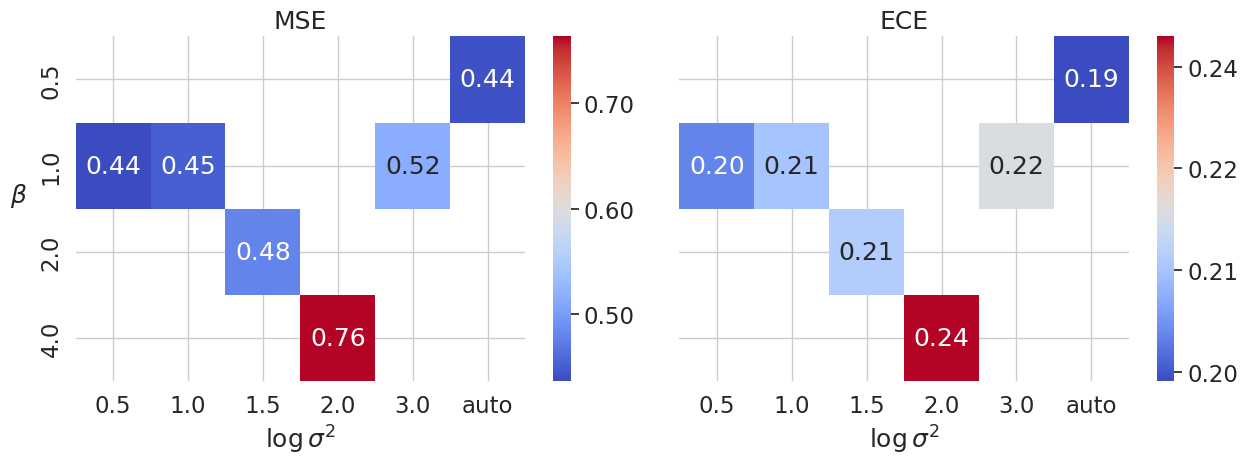

In [19]:
import matplotlib.ticker as ticker

sns.set_theme(style="whitegrid", font_scale=1.5)
sns.set_palette("colorblind")
sns.despine()

fig, axes = plt.subplots(
    1, 2, figsize=(13, 5), gridspec_kw={"width_ratios": [1, 1]}, sharey=True
)
# fig.suptitle(
#     r"Illness($H=24$) - $VAE$"
# )

metrics = ["test_mse_mean", "test_ece_mean"]
titles = ["MSE", "ECE"]

for i, (metric, title, ax) in enumerate(zip(metrics, titles, axes.flat)):
    # Pivot the data to create the heatmap matrix
    heatmap_data = keep_sorted_df.pivot(
        index="beta", columns="fixed_logvar", values=metric
    )

    # Create heatmap
    sns.heatmap(
        heatmap_data,
        ax=ax,
        cmap="coolwarm",
        annot=True,
        fmt=".2f",
    )

    cbar = ax.collections[0].colorbar
    cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
    cbar.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))

    ax.set_title(title)
    ax.set_ylabel(r"$\beta$", labelpad=15)
    ax.yaxis.label.set_rotation(0)
    ax.set_xlabel(r"$\log \sigma^2$")

ax.set_ylabel(None)

plt.tight_layout()
# plt.savefig(
#     "/mnt/vdb/abenechehab/dicl-adapters/figures/from_notebooks/beta_sigma.pdf",
#     dpi=300,
#     bbox_inches="tight",
# )
plt.show()

In [10]:
from dicl.utils.main_script import prepare_data

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="Illness_pred=24", context_length=512, forecasting_horizon=24
)
print(
    f"Illness_pred=24, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

Illness_pred=24, size: (141, 7, 512), val size (74, 7, 512), test size (170, 7, 512)


In [13]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ETTh1_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ETTh1_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ETTh1_pred=96, size: (8033, 7, 512), val size (2785, 7, 512), test size (2785, 7, 512)


In [14]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="Weather_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"Weather_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

Weather_pred=96, size: (36280, 21, 512), val size (5175, 21, 512), test size (10444, 21, 512)


In [15]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ExchangeRate_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ExchangeRate_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ExchangeRate_pred=96, size: (4704, 8, 512), val size (665, 8, 512), test size (1422, 8, 512)


In [16]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ETTh2_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ETTh2_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ETTh2_pred=96, size: (8033, 7, 512), val size (2785, 7, 512), test size (2785, 7, 512)


In [17]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="ETTm1_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"ETTm1_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

ETTm1_pred=96, size: (33953, 7, 512), val size (11425, 7, 512), test size (11425, 7, 512)


In [18]:
X_train, y_train, X_val, y_val, X_test, y_test, n_features = prepare_data(
    dataset_name="Traffic_pred=96", context_length=512, forecasting_horizon=96
)
print(
    f"Traffic_pred=96, size: {X_train.shape}, val size {X_val.shape}, test size {X_test.shape}"
)

Traffic_pred=96, size: (11673, 862, 512), val size (1661, 862, 512), test size (3413, 862, 512)
